# Convolutional Neural Networks for Galaxy Classification

* **Author:**
Yash Savalia
* **Date:**
12/15/2022
* **Time spent on this assignment:** 5 hours

### Gathering the data
Using the Galaxy10 dataset, we will train a convolutional neural network to classify galaxies into 10 classes. We will use the Keras library to build the network, and the TensorFlow backend to train it.

In [27]:
import tensorflow as tf
from tensorflow import keras
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from astroNN.datasets import load_galaxy10
from sklearn.model_selection import train_test_split

We will begin by loading the data and spliting it up into training and testing sets.

In [ ]:
images, labels = load_galaxy10()

In [3]:
#spliting the data into training and testing
train_idx, test_idx = train_test_split(np.arange(labels.shape[0]), test_size=0.1)
train_images, train_labels, test_images, test_labels = images[train_idx], labels[train_idx], images[test_idx], labels[test_idx]

#normalizing the data
train_images = train_images / 255.0
test_images = test_images / 255.0

Number of train images: 19606
Number of test images: 2179
Image shape: (69, 69, 3)


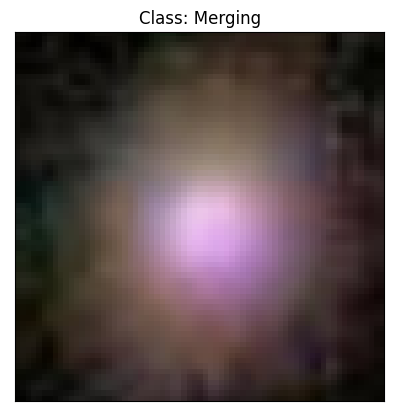

In [4]:
class_names = ['Disturbed',
               'Merging',
               'Round Smooth',
               'In-between Round Smooth',
               'Cigar Shaped Smooth',
               'Barred Spiral',
               'Unbarred Tight Spiral',
               'Unbarred Loose Spiral',
               'Edge-on without Bulge',
               'Edge-on with Bulge']

print("Number of train images:", train_images.shape[0])
print("Number of test images:", test_images.shape[0])

print("Image shape:", train_images.shape[1:])

plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title(f"Class: {class_names[train_labels[0]]}")
plt.show()


### Building the model

Now that we have collected our data we can start building our ML model to classify the galaxies. We will create a sequential model with 3 convolutional, 2 pooling, and 2 dense layers. We will use the Adam optimizer and the categorical crossentropy loss function. We will also use the accuracy metric to evaluate our model.

In [5]:
#defining the model
model = keras.Sequential(name='GalaxyClassificationModel')

#adding convolutional and pooling layers to the model
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(69, 69, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#flattening inputs and adding dense layers to the model
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

print(model.summary())

Model: "GalaxyClassificationModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 67, 67, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 33, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 10816

In [6]:
# Compile the model
loss = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer='adam',
                loss=loss,
                metrics=['accuracy'])

### Training the model

Now that we have built our model we can train it. We will train the model for 10 epochs and use a batch size of 32. We will also use the test data to evaluate the validity of the model after each epoch.

In [7]:
# Train the model
batch_size = 32
epochs = 1
history = model.fit(train_images, train_labels, epochs=epochs,
                    batch_size=batch_size, validation_data=(test_images, test_labels))


Epoch 1/10
613/613 [==============================] - 52s 83ms/step - loss: 1.2756 - accuracy: 0.4907 - val_loss: 1.0794 - val_accuracy: 0.5810
Epoch 2/10
613/613 [==============================] - 51s 84ms/step - loss: 0.8978 - accuracy: 0.6684 - val_loss: 0.8460 - val_accuracy: 0.6971
Epoch 3/10
613/613 [==============================] - 53s 86ms/step - loss: 0.7308 - accuracy: 0.7319 - val_loss: 0.8030 - val_accuracy: 0.7012
Epoch 4/10
613/613 [==============================] - 54s 88ms/step - loss: 0.6355 - accuracy: 0.7667 - val_loss: 0.6955 - val_accuracy: 0.7595
Epoch 5/10
613/613 [==============================] - 57s 93ms/step - loss: 0.5548 - accuracy: 0.7973 - val_loss: 0.6691 - val_accuracy: 0.7678
Epoch 6/10
613/613 [==============================] - 61s 100ms/step - loss: 0.4888 - accuracy: 0.8212 - val_loss: 0.6760 - val_accuracy: 0.7742
Epoch 7/10
613/613 [==============================] - 62s 102ms/step - loss: 0.4350 - accuracy: 0.8387 - val_loss: 0.7237 - val_accurac

Here we can show the accuracy of the model as it trains. We can see that the accuracy increases with each epoch.

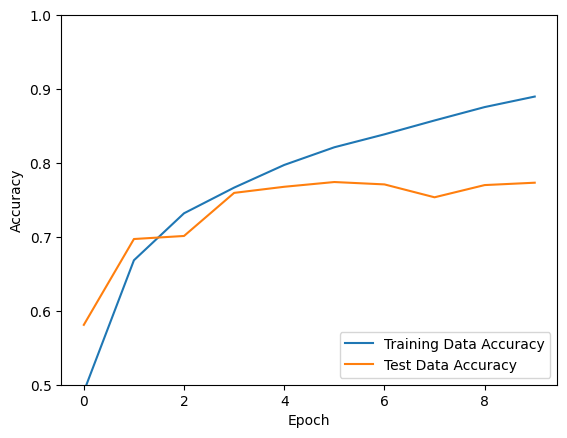

In [8]:
plt.plot(history.history['accuracy'], label='Training Data Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Data Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


### Testing the model

We can now test the model on the test data. Sampling some images from the test set we can see how the model performs on unseen data. (We did test the model on the testing data after each epoch, here we are doing it more explicitly.)

In [9]:
# Using the model to classify the test images
predictions = model.predict(test_images)

69/69 [==============================] - 2s 21ms/step


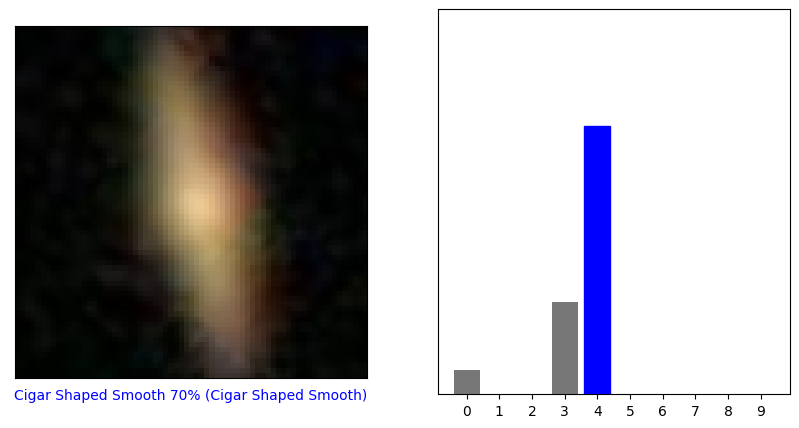

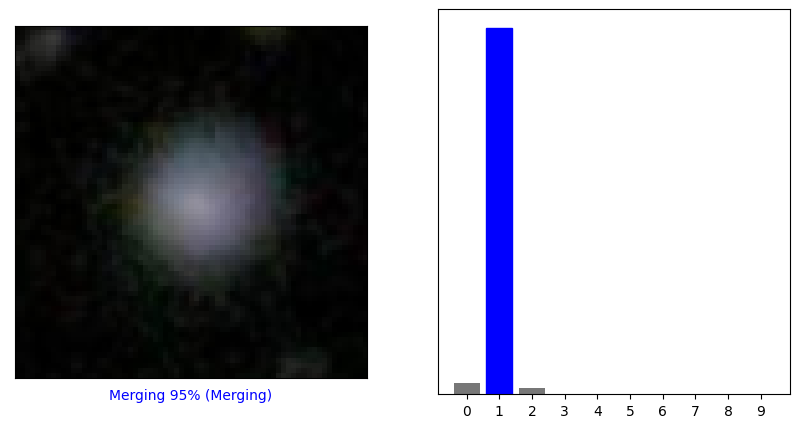

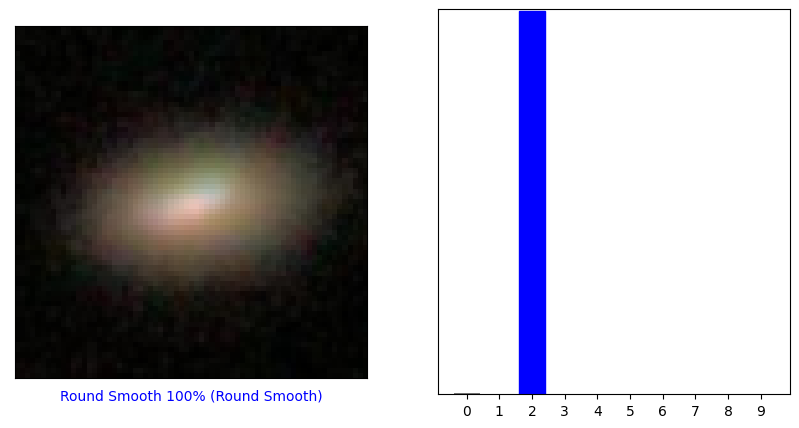

In [20]:
def plot_image(predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(
        f"{class_names[predicted_label]} {(100*np.max(predictions_array)):2.0f}% ({class_names[true_label]})", color=color)


def plot_value_array(predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


for i in range(3):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plot_image(predictions[i], test_labels[i], test_images[i])
    plt.subplot(1, 2, 2)
    plot_value_array(predictions[i], test_labels[i])
    plt.show()



In [26]:
percent_corrent = len([predictions[i] for i in range(len(
    predictions)) if np.argmax(predictions[i]) == test_labels[i]])/len(predictions)

print(f"Percent correct: {percent_corrent*100}%")


Percent correct: 77.3290500229463%


### Conclusion

We see that our CNN was able to break 80% getting to 88.98% accuracy on the training data but 77.33% on the testing data. Adding more layers and more epochs would likely improve the accuracy of the model, however a more lengthly training time would be required. Despite this, the model was able to classify the galaxies with a high degree of accuracy and beat the MLP model that we built in the previous notebook.